## Santender Customer Transaction Prediction Problem
## https://www.kaggle.com/c/santander-customer-transaction-prediction

#### Importing libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Reading spreadsheets

In [2]:
#Reading train data
train_data = pd.read_csv("train.csv")
#Missing values imputed with 0 
train_data.fillna(0,inplace = True)
# Indexing train data
train_data['index'] = np.arange(len(train_data))

#Reading test data
test_data = pd.read_csv("test.csv")
#Missing values imputed with 0 
test_data.fillna(0,inplace = True)
# Indexing train data
test_data['index'] = np.arange(len(test_data))

#### Summarizing train and test

In [5]:
print('Records in training data', str(len(train_data)))
print('Records in test data', str(len(test_data)))

Records in training data 200000
Records in test data 200000


In [6]:
print('Columns in training data', str(len(train_data.columns)))
print('Columns in test data', str(len(test_data.columns)))

Columns in training data 203
Columns in test data 202


In [7]:
print('Prediction variable list of values', str(list(train_data['target'].drop_duplicates())))

Prediction variable list of values [0, 1]


In [8]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,index
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537,99999.500000
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015,57735.171256
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800,0.000000
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475,49999.750000
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550,99999.500000
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800,149999.250000
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700,199999.000000


In [10]:
test_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,index
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342,99999.500000
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589,57735.171256
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800,0.000000
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000,49999.750000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950,99999.500000
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400,149999.250000
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400,199999.000000


In [11]:
train_data.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,index
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,0
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,1


In [12]:
test_data.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,index
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,0
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,1


#### Building logistic regression model and training on train data

In [13]:
# Fit logistic regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model_fit = model.fit(train_data.iloc[:,2:len(train_data.columns)-1],train_data.iloc[:,1:2])

/lrlhps/apps/python/python-3.8.5/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Model evaluation on train data

In [17]:
train_results = model_fit.predict(train_data.iloc[:,2:len(train_data.columns)-1])
predictions = pd.DataFrame({'target_predicted': train_results})
#Indexing predictions
predictions['index'] = np.arange(len(predictions))
# len(predictions)

In [18]:
# Merge predictions and train data
logistic_regression_results = pd.merge(train_data, predictions, how = 'left', on = 'index')

In [19]:
model_fit.score(train_data.iloc[:,2:len(train_data.columns)-1],train_data.iloc[:,1:2])

0.91444

<AxesSubplot:>

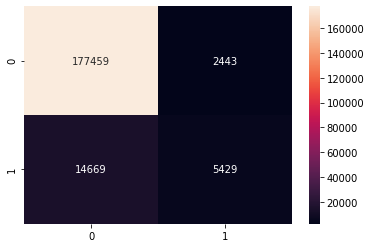

In [24]:
conf_matrix= confusion_matrix(train_data.iloc[:,1:2], model_fit.predict(train_data.iloc[:,2:len(train_data.columns)-1]))
sns.heatmap(conf_matrix, annot=True,fmt='.0f')

In [25]:
print(classification_report(train_data.iloc[:,1:2], model_fit.predict(train_data.iloc[:,2:len(train_data.columns)-1])))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    179902
           1       0.69      0.27      0.39     20098

    accuracy                           0.91    200000
   macro avg       0.81      0.63      0.67    200000
weighted avg       0.90      0.91      0.90    200000



#### Predictions on test data

In [27]:
test_results = model_fit.predict(test_data.iloc[:,2:len(test_data.columns)])
predictions = pd.DataFrame({'target_predicted': test_results})
#Indexing predictions
predictions['index'] = np.arange(len(predictions))

In [28]:
# Merge predictions and train data
logistic_regression_results = pd.merge(test_data, predictions, how = 'left', on = 'index')
logistic_regression_results[['ID_code','target_predicted']].head(2)

,ID_code,target_predicted
0,test_0,0
1,test_1,0


In [39]:
logistic_regression_results.groupby('target_predicted')['ID_code'].count()

target_predicted
0      3850
1    196150
Name: ID_code, dtype: int64